In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
  
# fetch dataset 
contraceptive_method_choice = fetch_ucirepo(id=30) 
  
# data (as pandas dataframes) 
X = contraceptive_method_choice.data.features 
y = contraceptive_method_choice.data.targets 
  
# metadata 
print(contraceptive_method_choice.metadata) 
  
# variable information 
print(contraceptive_method_choice.variables) 

{'uci_id': 30, 'name': 'Contraceptive Method Choice', 'repository_url': 'https://archive.ics.uci.edu/dataset/30/contraceptive+method+choice', 'data_url': 'https://archive.ics.uci.edu/static/public/30/data.csv', 'abstract': 'Dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1473, 'num_features': 9, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Education Level', 'Other', 'Occupation'], 'target_col': ['contraceptive_method'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C59W2D', 'creators': ['Tjen-Sien Lim'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either

In [3]:
data = pd.concat([X, y], axis=1)

## 2. Coleta Inicial

Tamanho dos Dados

In [4]:
data.shape

(1473, 10)

Exemplo de Registros dos dados

In [5]:
data.head()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


## Descrição dos Dados

Tipos dos dados

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   wife_age                  1473 non-null   int64
 1   wife_edu                  1473 non-null   int64
 2   husband_edu               1473 non-null   int64
 3   num_children              1473 non-null   int64
 4   wife_religion             1473 non-null   int64
 5   wife_working              1473 non-null   int64
 6   husband_occupation        1473 non-null   int64
 7   standard_of_living_index  1473 non-null   int64
 8   media_exposure            1473 non-null   int64
 9   contraceptive_method      1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


Estatísticas descritídas

In [7]:
data.describe()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


Distribuição + Visualização

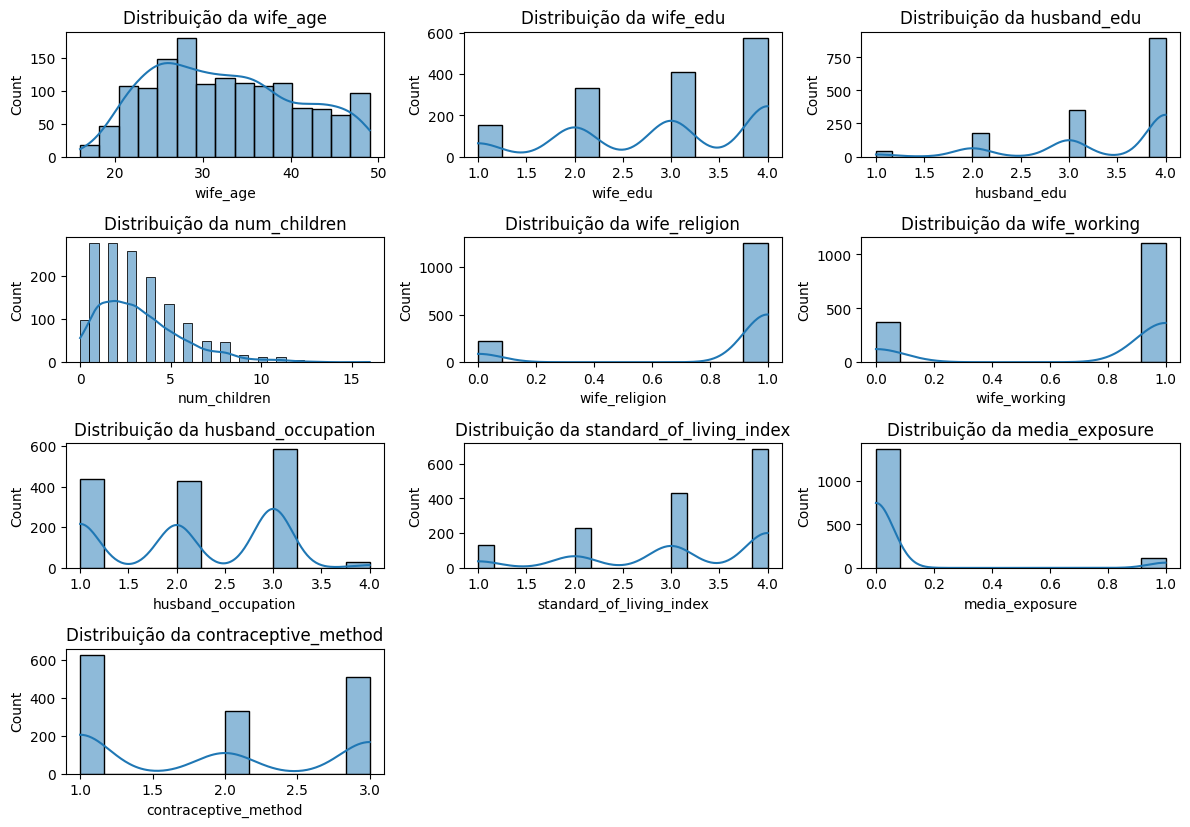

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribuição da {column}')
plt.tight_layout()
plt.show()

## Exploração dos Dados

Valores Ausentes

In [9]:
data.isnull().sum().sort_values()

wife_age                    0
wife_edu                    0
husband_edu                 0
num_children                0
wife_religion               0
wife_working                0
husband_occupation          0
standard_of_living_index    0
media_exposure              0
contraceptive_method        0
dtype: int64

Outliers

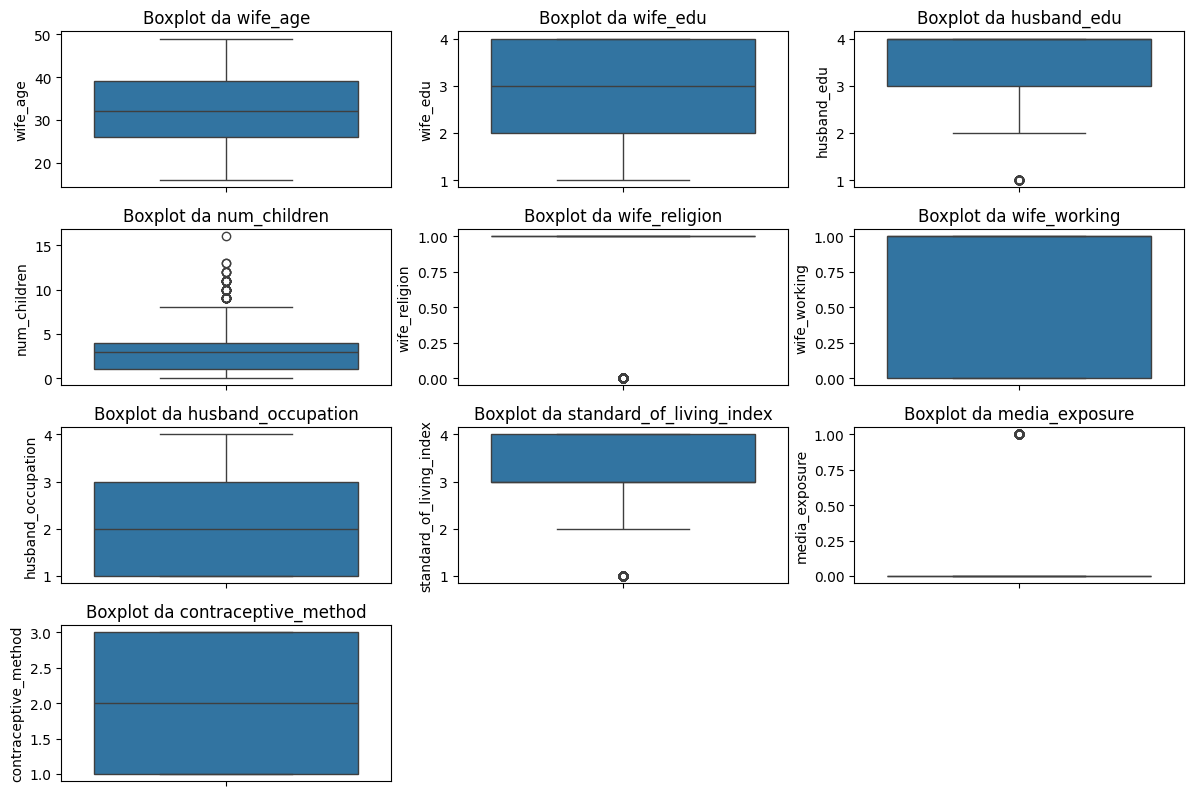

In [10]:
import numpy as np

plt.figure(figsize=(12, 10))
for i, column in enumerate(data.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot da {column}')
plt.tight_layout()
plt.show()

Analise de correlações

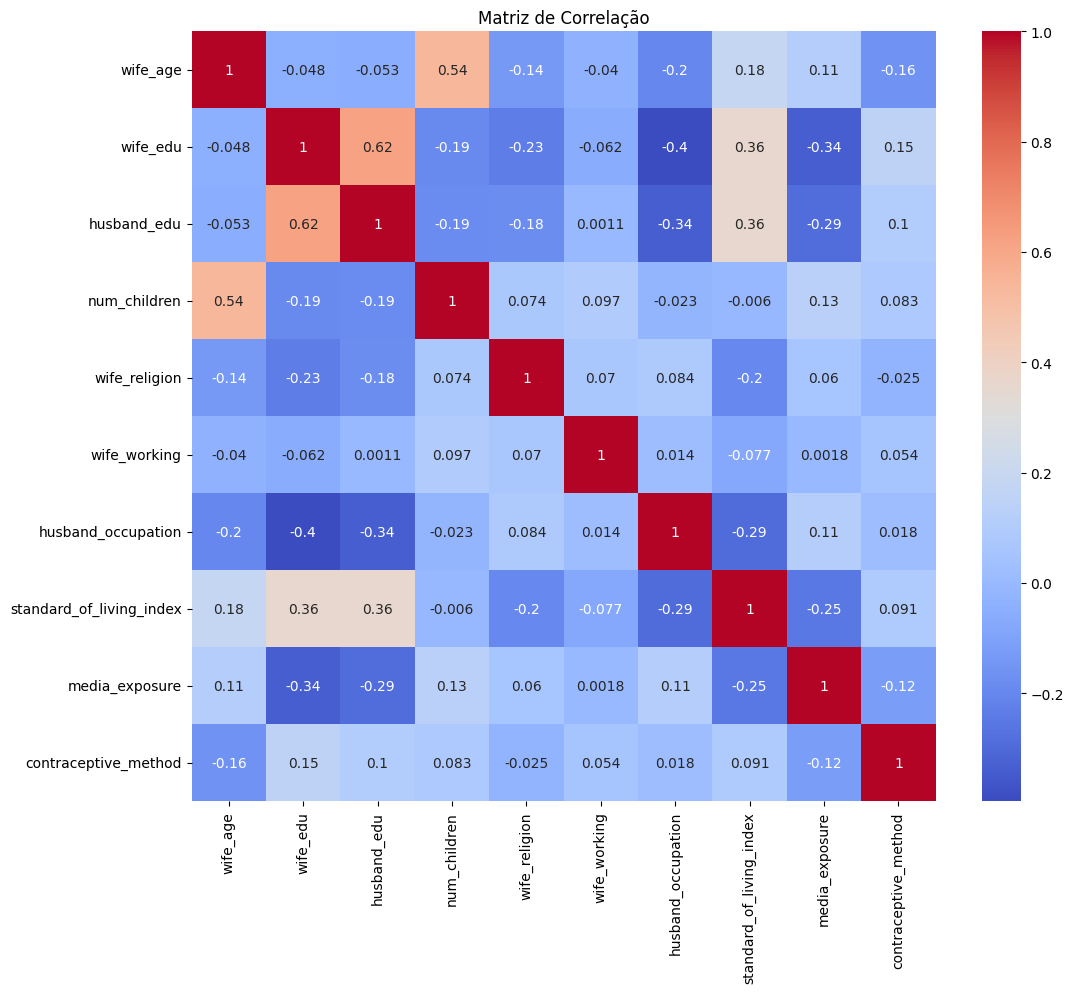

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Visualizações adicionais (pair plots)

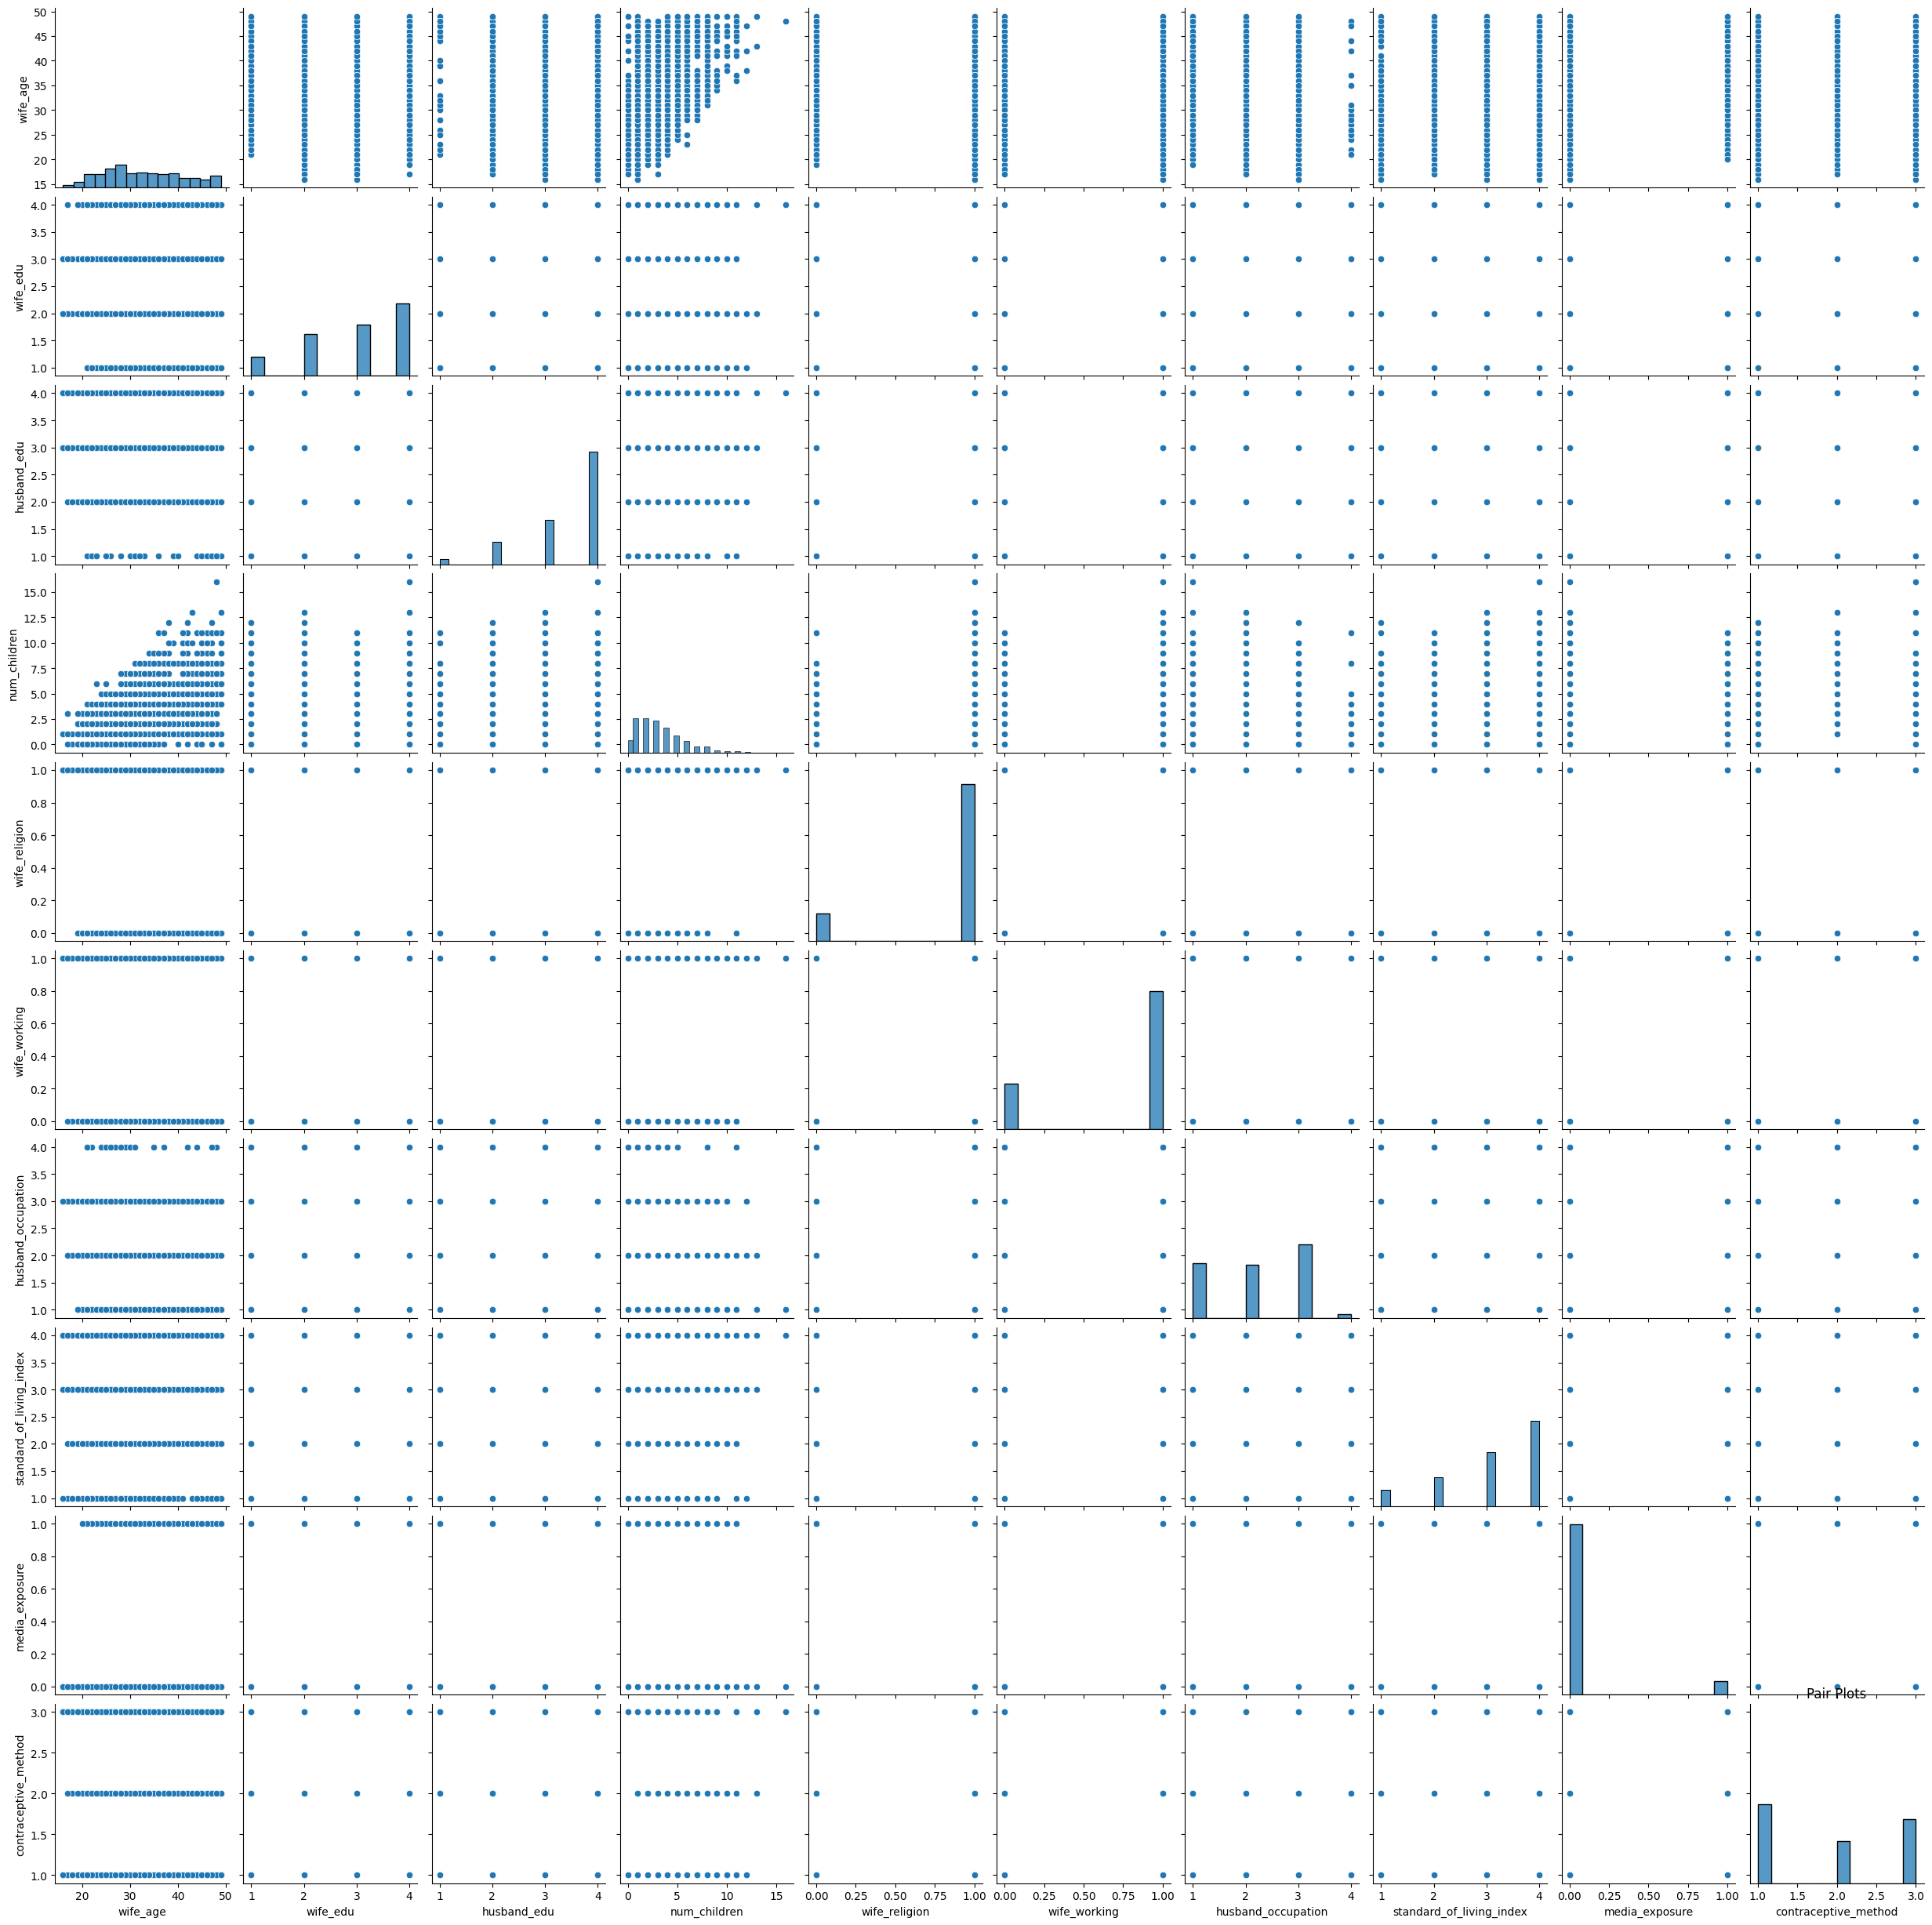

In [12]:
sns.pairplot(data)
plt.title('Pair Plots')
plt.show()

## 5. Qualidade dos dados

In [13]:
data.duplicated().sum()

48

## Preparação dos dados

Split the dataset

In [14]:
target_feature = data[['contraceptive_method']].columns
features_names = data.columns.drop(target_feature)
numeric_features = data[['wife_age', 'num_children']].columns
categorical_features = data.columns.difference(numeric_features).drop(target_feature)

data[categorical_features] = data[categorical_features].astype('category')
data[numeric_features] = data[numeric_features].astype('int')

X = data.drop(columns=target_feature)
y = data[target_feature]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Concatenate the training data to perform preprocessing steps

In [15]:
train_data = X_train.copy()
train_data['contraceptive_method'] = y_train

In [16]:
train_data.shape

(883, 10)

Remove duplicates in the training data

In [17]:
train_data.drop_duplicates(inplace=True)

In [18]:
train_data.shape

(867, 10)

Remove outliers in the numeric columns of the training data

In [19]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First Quartile
        Q3 = df[col].quantile(0.75)  # Third Quartile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Filter data
    return df

train_data = remove_outliers_iqr(train_data, numeric_features)

In [20]:
train_data.shape

(848, 10)

Re-split the processed training data back into features and target

In [21]:
X_train = train_data.drop(columns=target_feature)
y_train = train_data[target_feature]

Continue with the preprocessing pipeline scaling the numerical features

In [22]:
X_train_numeric = X_train[numeric_features].reset_index(drop=True)
X_train_categorical = X_train[categorical_features].reset_index(drop=True)
numeric_scaler = StandardScaler()
numeric_scaler.fit(X_train_numeric)
X_numeric_transformed = numeric_scaler.transform(X_train_numeric)
X_numeric_transformed = pd.DataFrame(X_numeric_transformed, columns=numeric_features)

X_train_transformed = pd.concat([X_train_categorical, X_numeric_transformed], axis=1)

In [23]:
X_train_transformed.shape

(848, 9)

In [24]:
X_train_transformed.head()

,husband_edu,husband_occupation,media_exposure,standard_of_living_index,wife_edu,wife_religion,wife_working,wife_age,num_children
0,3,2,0,3,2,1,1,0.411488,1.321789
1,2,2,0,4,2,1,0,-0.566967,0.852017
2,3,3,0,4,2,1,1,1.145329,1.791561
3,4,1,0,4,4,1,0,1.756863,0.382244
4,4,1,0,4,4,1,1,1.389942,0.382244


Apply SMOTE on the processed training data

In [25]:
smote = SMOTENC(random_state=42, categorical_features=categorical_features.to_list())
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [26]:
X_train_resampled.shape

(1098, 9)

In [27]:
y_train_resampled.shape

(1098, 1)

In [28]:
X_train_resampled.head()

,husband_edu,husband_occupation,media_exposure,standard_of_living_index,wife_edu,wife_religion,wife_working,wife_age,num_children
0,3,2,0,3,2,1,1,0.411488,1.321789
1,2,2,0,4,2,1,0,-0.566967,0.852017
2,3,3,0,4,2,1,1,1.145329,1.791561
3,4,1,0,4,4,1,0,1.756863,0.382244
4,4,1,0,4,4,1,1,1.389942,0.382244


In [29]:
y_train_resampled.head()

,contraceptive_method
0,1
1,3
2,2
3,2
4,2


Show statistics after processing the data

In [30]:
processed_train_data = X_train_resampled
processed_train_data['contraceptive_method'] = y_train_resampled

In [31]:
processed_train_data.describe()

,wife_age,num_children,contraceptive_method
count,1098.000000,1098.000000,1098.000000
mean,0.021426,0.046691,2.000000
std,0.972845,0.978680,0.816869
min,-2.034650,-1.496846,1.000000
25%,-0.811581,-0.557301,1.000000
50%,-0.020665,-0.087528,2.000000
75%,0.778408,0.846705,3.000000
max,2.001477,2.731106,3.000000


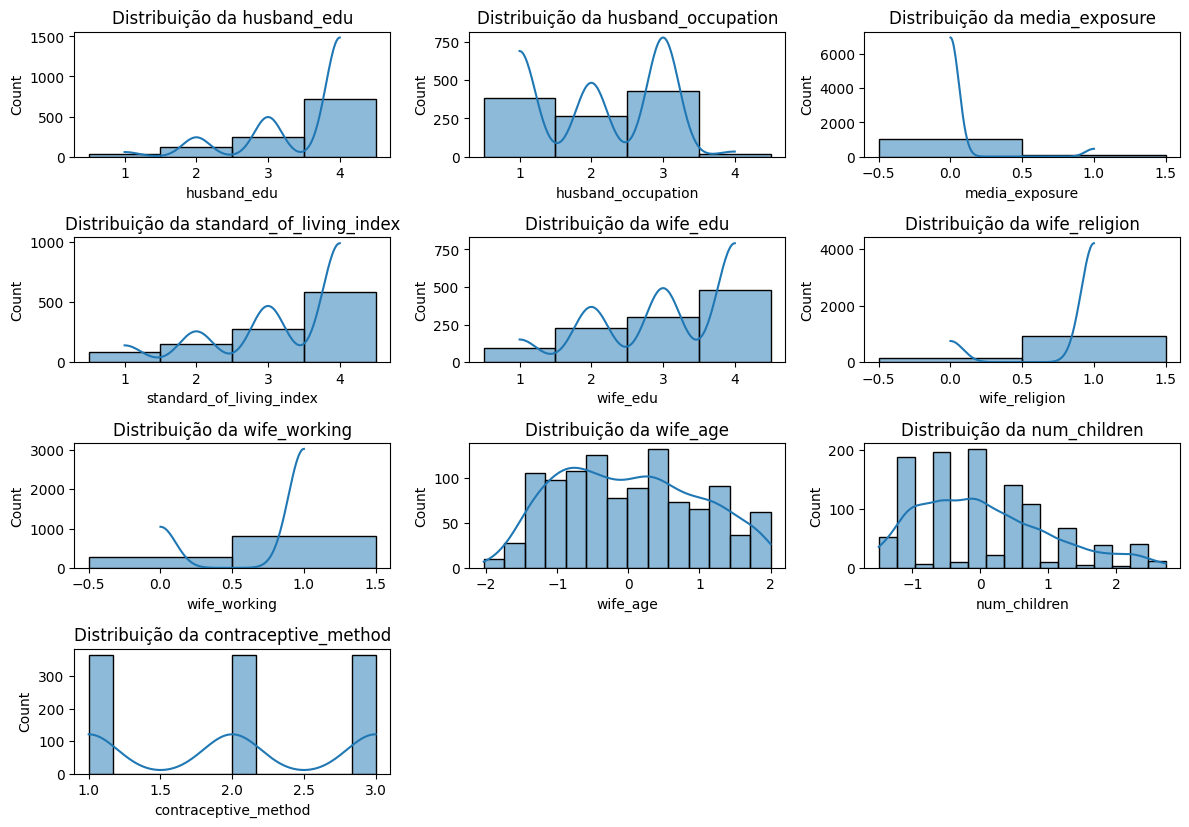

In [32]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(processed_train_data.columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(processed_train_data[column], kde=True)
    plt.title(f'Distribuição da {column}')
plt.tight_layout()
plt.show()

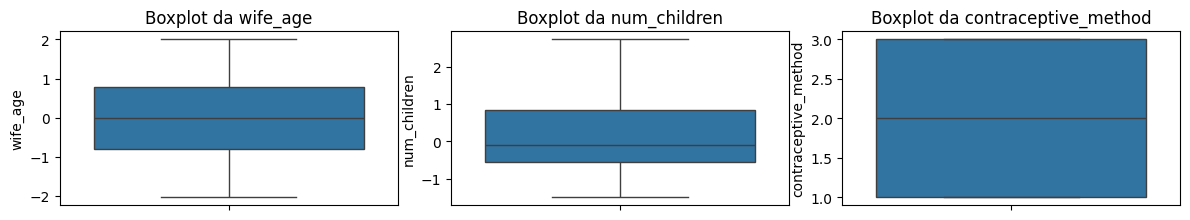

In [33]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(processed_train_data.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(processed_train_data[column])
    plt.title(f'Boxplot da {column}')
plt.tight_layout()
plt.show()

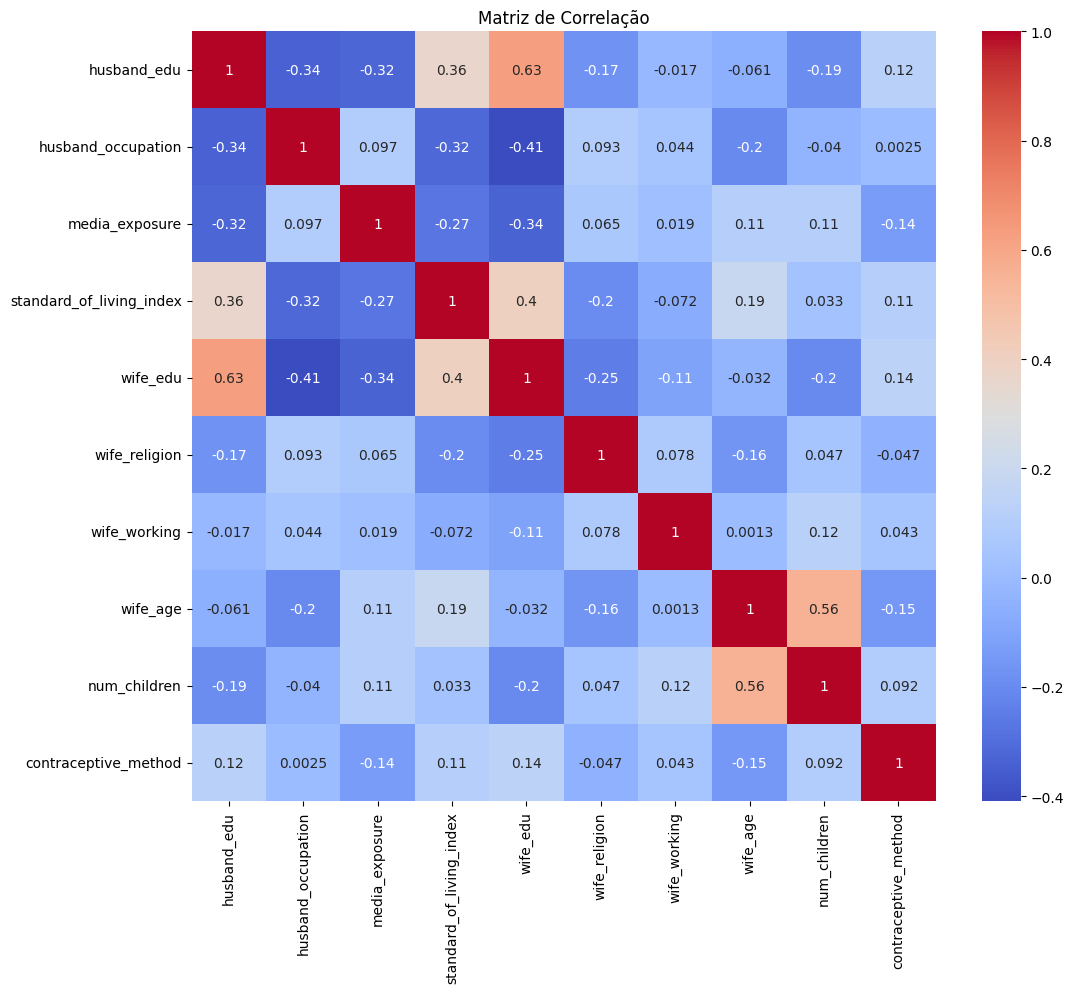

In [34]:
correlation_matrix = processed_train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Modelagem

In [76]:
X_processed = processed_train_data.drop(['contraceptive_method'], axis=1)
y_processed = processed_train_data['contraceptive_method']

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, 
    y_processed, 
    test_size=0.15,  
    random_state=42  
)

## 1. Seleção de Modelos
Os modelos selecionados são:
- K-NN (K-Nearest Neighbors)
- LVQ (Learning Vector Quantization)
- Árvore de Decisão
- SVM (Support Vector Machine)
- Random Forest
- Rede Neural MLP (Multi-Layer Perceptron)
- Comitê de Redes Neurais Artificiais
- Comitê Heterogêneo

In [77]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np

knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
svm = SVC(probability=True)
random_forest = RandomForestClassifier()
mlp = MLPClassifier()
voting_classifier = VotingClassifier(estimators=[('mlp', mlp), ('rf', random_forest)], voting='soft')

models = {
    'KNN': knn,
    'Decision Tree': decision_tree,
    'SVM': svm,
    'Random Forest': random_forest,
    'MLP': mlp,
    'Voting Classifier': voting_classifier
}

## 2. Metodologia de Validação


In [78]:
y_train_1d = y_train.values.ravel() # colocando em uma dimensão

cv_results_dict = {}

k_folds = 10
for name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train_1d, cv=k_folds)
    cv_results_dict[name] = cv_results.mean()

c:\Users\vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

In [79]:
cv_results_dict

{'KNN': 0.5444863875543353,
 'Decision Tree': 0.5262296957218028,
 'SVM': 0.5551246854266759,
 'Random Forest': 0.5948295584534431,
 'MLP': 0.5648135438114849,
 'Voting Classifier': 0.6034317089910777}

## 3. Busca de Hiperparâmetros

In [80]:
param_distributions = {
    'KNN': {'n_neighbors': np.arange(1, 4), 'metric': ['euclidean']},
    'Decision Tree': {'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    'SVM': {'C': [0.1, 1], 'gamma': [0.1, 0.01], 'kernel': ['linear']},
    'Random Forest': {'n_estimators': [10, 50], 'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    'MLP': {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu'], 'solver': ['adam']}
}

models.pop('Voting Classifier', None) # Não da pra rodar RandomizedSearchCV pra ele, já que é só uma combinação entre outros modelos

VotingClassifier(estimators=[('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [81]:

n_iter_search = 100
k_folds = 10

best_params = {}
best_scores = {}

for model_name, model in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_distributions[model_name], n_iter=n_iter_search, cv=k_folds, verbose=1, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_params[model_name] = random_search.best_params_
    best_scores[model_name] = random_search.best_score_
    print(f'{model_name} - Melhores hiperparâmetros: {random_search.best_params_}')
    print(f'{model_name} - Melhor score: {random_search.best_score_}')

c:\Users\vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 3 candidates, totalling 30 fits
KNN - Melhores hiperparâmetros: {'n_neighbors': 1, 'metric': 'euclidean'}
KNN - Melhor score: 0.5616334934797529
Fitting 10 folds for each of 4 candidates, totalling 40 fits


c:\Users\vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Decision Tree - Melhores hiperparâmetros: {'min_samples_split': 5, 'max_depth': 10}
Decision Tree - Melhor score: 0.5562685884237017
Fitting 10 folds for each of 4 candidates, totalling 40 fits


c:\Users\vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM - Melhores hiperparâmetros: {'kernel': 'linear', 'gamma': 0.1, 'C': 1}
SVM - Melhor score: 0.5464767787691605
Fitting 10 folds for each of 8 candidates, totalling 80 fits


c:\Users\vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest - Melhores hiperparâmetros: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
Random Forest - Melhor score: 0.6109471516815375
Fitting 10 folds for each of 2 candidates, totalling 20 fits


c:\Users\vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=100. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


MLP - Melhores hiperparâmetros: {'solver': 'adam', 'hidden_layer_sizes': (50,), 'activation': 'relu'}
MLP - Melhor score: 0.5765843056508808


c:\Users\vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:
best_params

{'KNN': {'n_neighbors': 1, 'metric': 'euclidean'},
 'Decision Tree': {'min_samples_split': 5, 'max_depth': 10},
 'SVM': {'kernel': 'linear', 'gamma': 0.1, 'C': 1},
 'Random Forest': {'n_estimators': 50,
  'min_samples_split': 2,
  'max_depth': 10},
 'MLP': {'solver': 'adam', 'hidden_layer_sizes': (50,), 'activation': 'relu'}}

In [83]:
best_scores

{'KNN': 0.5616334934797529,
 'Decision Tree': 0.5562685884237017,
 'SVM': 0.5464767787691605,
 'Random Forest': 0.6109471516815375,
 'MLP': 0.5765843056508808}

## 4. Resultados da Modelagem

In [88]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, f1, roc_auc, recall


In [89]:
evaluation_results = {}

for name, model in models.items():
    model.fit(X_train, y_train_1d)
    accuracy, f1, roc_auc, recall = evaluate_model(model, X_test, y_test)
    evaluation_results[name] = {
        'Acurácia': accuracy,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Recall': recall
    }

c:\Users\vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [90]:
for name, metrics in evaluation_results.items():
    print(f'{name} - Acurácia: {metrics["Acurácia"]:.4f}, F1-Score: {metrics["F1-Score"]:.4f}, ROC AUC: {metrics["ROC AUC"]:.4f}, Recall: {metrics["Recall"]:.4f}')

KNN - Acurácia: 0.6061, F1-Score: 0.6016, ROC AUC: 0.7749, Recall: 0.6061
Decision Tree - Acurácia: 0.5636, F1-Score: 0.5654, ROC AUC: 0.6711, Recall: 0.5636
SVM - Acurácia: 0.6061, F1-Score: 0.6076, ROC AUC: 0.7725, Recall: 0.6061
Random Forest - Acurácia: 0.6727, F1-Score: 0.6737, ROC AUC: 0.8286, Recall: 0.6727
MLP - Acurácia: 0.5818, F1-Score: 0.5812, ROC AUC: 0.7781, Recall: 0.5818


In [91]:
df_evaluation_results = pd.DataFrame(evaluation_results).T
print(df_evaluation_results)

               Acurácia  F1-Score   ROC AUC    Recall
KNN            0.606061  0.601640  0.774933  0.606061
Decision Tree  0.563636  0.565390  0.671074  0.563636
SVM            0.606061  0.607589  0.772501  0.606061
Random Forest  0.672727  0.673707  0.828600  0.672727
MLP            0.581818  0.581161  0.778065  0.581818


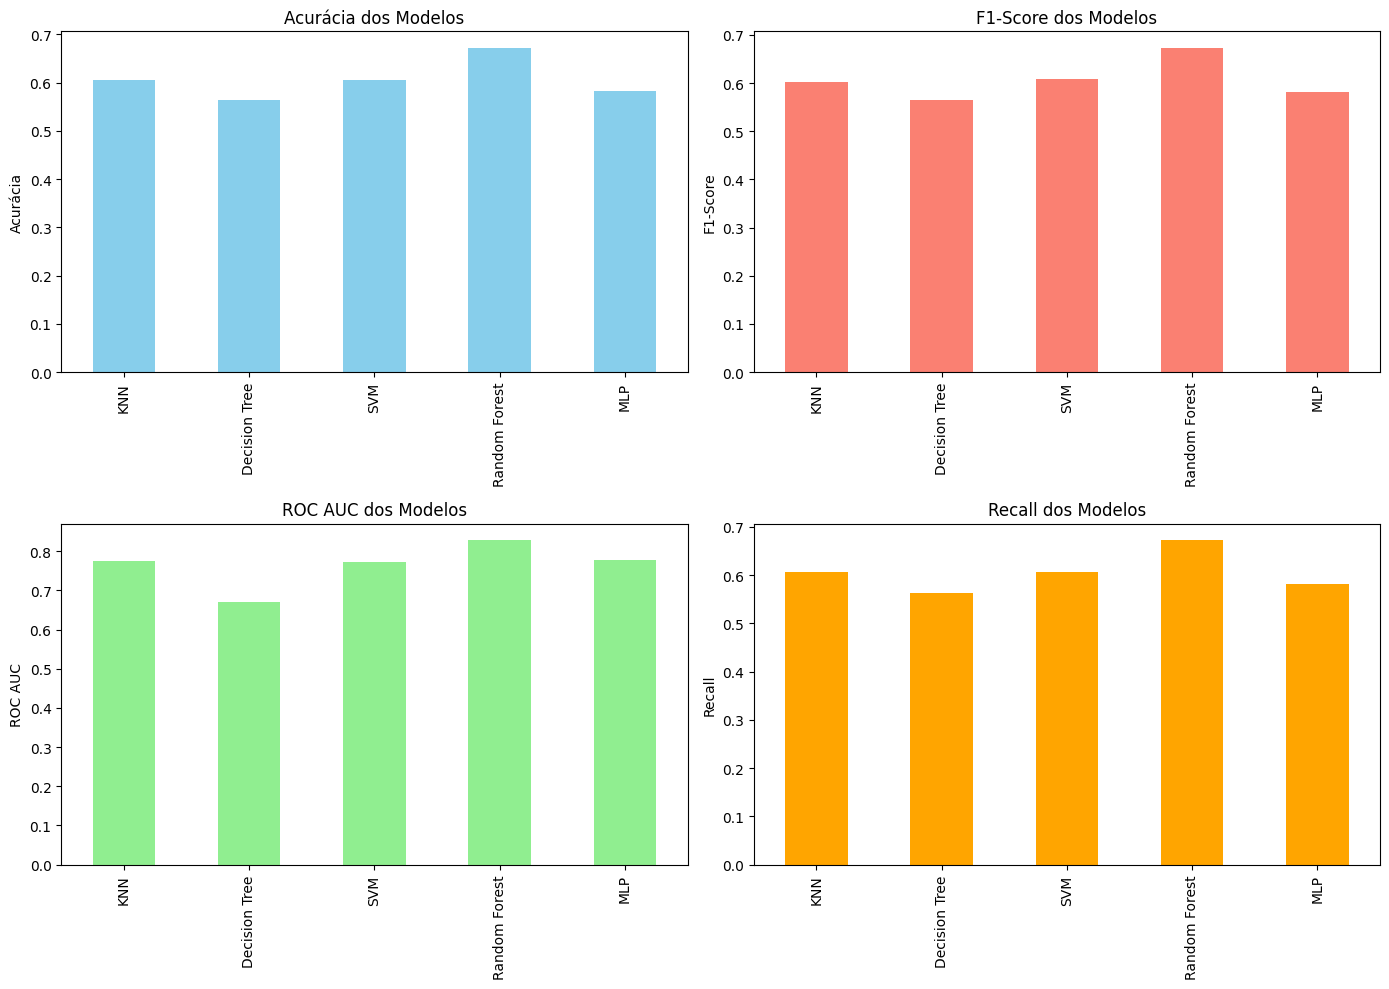

In [92]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Acurácia
df_evaluation_results['Acurácia'].plot(kind='bar', ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Acurácia dos Modelos')
ax[0, 0].set_ylabel('Acurácia')

#F1-Score
df_evaluation_results['F1-Score'].plot(kind='bar', ax=ax[0, 1], color='salmon')
ax[0, 1].set_title('F1-Score dos Modelos')
ax[0, 1].set_ylabel('F1-Score')

# ROC AUC
df_evaluation_results['ROC AUC'].plot(kind='bar', ax=ax[1, 0], color='lightgreen')
ax[1, 0].set_title('ROC AUC dos Modelos')
ax[1, 0].set_ylabel('ROC AUC')

# Recall
df_evaluation_results['Recall'].plot(kind='bar', ax=ax[1, 1], color='orange')
ax[1, 1].set_title('Recall dos Modelos')
ax[1, 1].set_ylabel('Recall')

plt.tight_layout()
plt.show()